In [ ]:
import jax
jax.config.update("jax_enable_x64", True)

import jax.numpy as jnp  # noqa: E402
import jax.random as jrng  # noqa: E402
import numpy as np  # noqa: E402

import ultraplot as uplt  # noqa: E402

from ornax.nested_sampling import nested_sampler_hmc  # noqa: E402

In [2]:
def log_likelihood(x):
    eggbox_max = 5.0 * jnp.pi
    x = 2.0 * eggbox_max * x - eggbox_max
    return jnp.power(2. + jnp.prod(jnp.cos(0.5 * x)), 3)


def log_prior(x):
    return 0.0


def prior_draw(rng_key):
    return jrng.uniform(rng_key, shape=(2,), minval=0, maxval=1)

In [5]:
(logZ, delta_logZ, samps, logw, loglike, ns_data) = nested_sampler_hmc(
    jrng.key(21),
    log_likelihood,
    log_prior,
    prior_draw,
    n_dims=2,
    n_live=1000,
    n_iter_max=100000,
    prior_domain=((0, 1), (0, 1)),
    verbose=True,
)

sampling (logZ: 2.26166e+01): 100%|█████| 33200/33200 [00:26<00:00, 1266.44it/s]


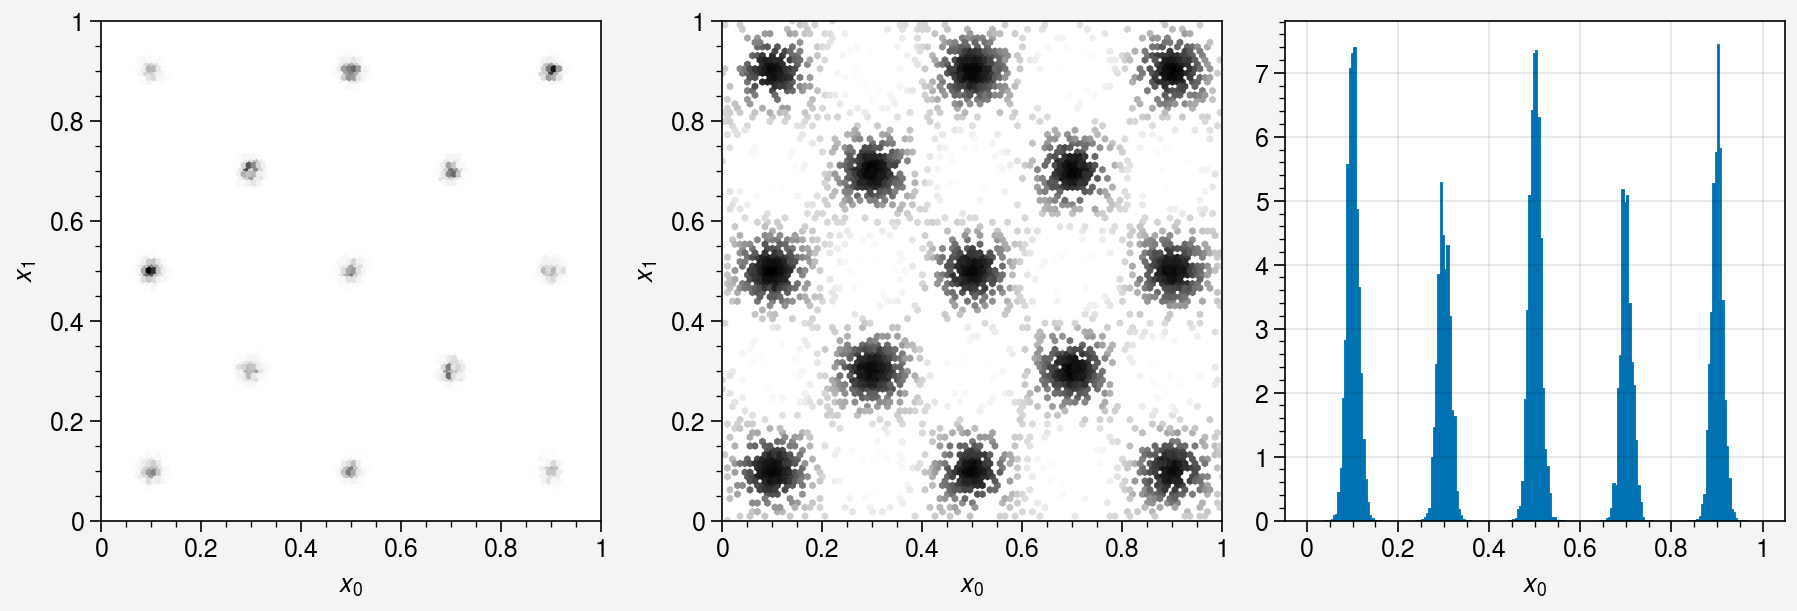

In [ ]:
wgts = jnp.exp(logw)
ng = 100
cmap = "grays"

fig, axs = uplt.subplots(ncols=3, nrows=1, share=0)

axs[0, 0].hexbin(
    samps[:, 0],
    samps[:, 1],
    weights=wgts,
    reduce_C_function=np.sum,
    gridsize=ng,
    cmap=cmap,
    discrete=False,
    norm="linear",
    extent=(0, 1, 0, 1)
);
axs[0, 0].format(grid=False, xlim=(0, 1), ylim=(0, 1), xlabel="$x_0$", ylabel="$x_1$")

axs[0, 1].hexbin(
    samps[:, 0],
    samps[:, 1],
    weights=wgts,
    reduce_C_function=np.sum,
    gridsize=ng,
    cmap=cmap,
    discrete=False,
    norm="log",
    extent=(0, 1, 0, 1)
)
axs[0, 1].format(grid=False, xlim=(0, 1), ylim=(0, 1), xlabel="$x_0$", ylabel="$x_1$")

axs[0, 2].hist(
    samps[:, 0],
    weights=wgts,
    density=True,
    bins=ng * 2,
)
axs[0, 2].format(xlabel="$x_0$")